# Problem 1 - Algorithmic Performance Scaling

## 1.1

**Link to dataset:** https://www.openml.org/search?type=data&sort=runs&status=active&qualities.NumberOfClasses=gte_2&qualities.NumberOfInstances=between_100000_1000000&id=247

In [34]:
import pandas as pd
from scipy.io import arff

data = arff.loadarff('BNG_letter.arff')
df = pd.DataFrame(data[0])
 #if I use the entire dataset of 1M inputs it is not trainable - it took over 30 min to train 10% of the training set
df = df.sample(n=60000, random_state=1234)

df

,x-box,y-box,width,high,onpix,x-bar,y-bar,x2bar,y2bar,xybar,x2ybr,xy2br,x-ege,xegvy,y-ege,yegvx,class
433572,1.609891,5.957451,2.537547,1.854088,1.092724,6.000000,7.559909,4.000000,6.629837,7.000000,6.000000,8.000000,0.430668,7.023259,3.359605,7.000000,b'L'
254298,3.000000,0.583811,5.000000,2.578403,1.536618,7.000000,8.000000,4.000000,4.029898,7.000000,7.852389,8.000000,0.928408,9.000000,3.462114,8.000000,b'W'
686334,8.277962,7.948827,8.488427,5.000000,7.226600,5.043599,7.000000,3.000000,1.782313,10.000000,8.062852,6.830171,7.124742,5.590345,3.000000,9.000000,b'M'
866486,7.868337,9.231733,8.234236,6.525569,3.000000,10.352279,4.784970,3.000000,5.000000,12.008342,2.531054,10.413125,2.000000,6.343045,7.657980,7.000000,b'L'
649015,4.000000,4.208034,6.000000,5.000000,4.920128,7.000000,7.000000,5.240829,6.673789,7.000000,6.000000,5.401460,2.000000,8.000000,8.866168,10.446010,b'B'
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
703573,3.000000,6.986953,1.178428,6.783203,0.897301,2.633956,3.313018,5.446958,5.459656,3.401244,2.632688,8.000000,1.003001,8.000000,0.725597,4.396088,b'L'
238219,1.470902,1.532329,2.205766,1.743872,0.724359,7.000000,8.564012,4.000000,1.672518,4.516507,9.525034,13.134923,2.000000,10.000000,5.085059,9.000000,b'V'
833326,4.000000,4.920287,5.000000,6.604708,0.927448,6.000000,8.000000,4.436106,3.197393,10.000000,11.163429,8.670790,4.239933,10.000000,9.756808,7.000000,b'W'
104477,4.000000,5.518803,5.000000,6.068813,2.000000,6.000000,8.000000,4.942459,5.765188,10.000000,5.000000,7.000000,3.000000,9.000000,2.000000,7.000000,b'U'


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60000 entries, 433572 to 195133
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x-box   60000 non-null  float64
 1   y-box   60000 non-null  float64
 2   width   60000 non-null  float64
 3   high    60000 non-null  float64
 4   onpix   60000 non-null  float64
 5   x-bar   60000 non-null  float64
 6   y-bar   60000 non-null  float64
 7   x2bar   60000 non-null  float64
 8   y2bar   60000 non-null  float64
 9   xybar   60000 non-null  float64
 10  x2ybr   60000 non-null  float64
 11  xy2br   60000 non-null  float64
 12  x-ege   60000 non-null  float64
 13  xegvy   60000 non-null  float64
 14  y-ege   60000 non-null  float64
 15  yegvx   60000 non-null  float64
 16  class   60000 non-null  object 
dtypes: float64(16), object(1)
memory usage: 8.2+ MB


In [36]:
df['class'] = df['class'].str.decode('utf-8').astype(str)

In [37]:
df['class'].unique()

array(['L', 'W', 'M', 'B', 'H', 'X', 'Y', 'A', 'U', 'V', 'G', 'T', 'I',
       'P', 'O', 'S', 'D', 'R', 'N', 'Z', 'Q', 'F', 'J', 'E', 'K', 'C'],
      dtype=object)

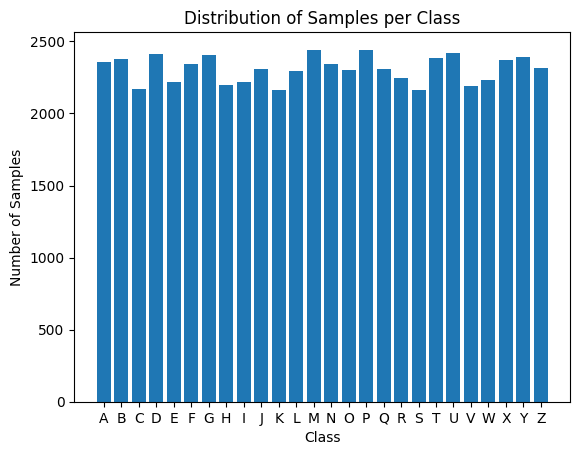

A    3.930000
B    3.963333
C    3.616667
D    4.015000
E    3.691667
F    3.906667
G    4.013333
H    3.658333
I    3.695000
J    3.845000
K    3.608333
L    3.825000
M    4.063333
N    3.903333
O    3.838333
P    4.070000
Q    3.851667
R    3.743333
S    3.603333
T    3.970000
U    4.030000
V    3.648333
W    3.715000
X    3.956667
Y    3.981667
Z    3.856667
Name: class, dtype: float64


In [38]:
import matplotlib.pyplot as plt

# Calculate the counts of each class
class_counts = df['class'].value_counts().sort_index()

# Plot the distribution
plt.bar(class_counts.index, class_counts.values)
plt.xlabel('Class')
plt.ylabel('Number of Samples')
plt.title('Distribution of Samples per Class')
plt.show()

print((class_counts/60000)*100) #to see the percentage of each class

**Answer:**
This is a Letter recognition dataset that was made by converting each lettter into 16 primitive numerical attributes - features - which were then scaled to fit into a range of integer values from 0 through 15.

Number of features: 16 numerical features + class - categorical target/label variable we are predicting

Number of instances: 60,000

Number of classes: 26 - letters in the alphabet

Number of numerical features: 16

Number of categorical features: 0, the only categorical variable is our class variable - categorical target/label variable we are predicting

From the above shown graph of the class distribution as well as percentages of all classes (all are between approx. 3-4%) we can conclude that the dataset is balanced.

## 1.2

In [39]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
import time



# Separate features and target
X = df.drop('class', axis=1)
y = df['class']

# Split data into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

# Create a list to store results
results = []

# Create subsets and train models
for subset_size in np.arange(0.1, 1.1, 0.1):
  subset_size = round(subset_size, 2) #to round
  print(subset_size) #to keep track what step we are on

  # Create a random subset of the training data
  random_indices = np.random.choice(len(X_train), size=int(len(X_train) * subset_size), replace=False) #without replacement
  X_train_subset = X_train.iloc[random_indices]
  y_train_subset = y_train.iloc[random_indices]

  # Decision Tree Classifier
  dt_classifier = DecisionTreeClassifier()
  start_time1 = time.time()
  dt_classifier.fit(X_train_subset, y_train_subset)
  training_time1 = time.time() - start_time1
  dt_pred = dt_classifier.predict(X_test)
  dt_accuracy = accuracy_score(y_test, dt_pred)

  # Gradient Boosting Classifier
  gb_classifier = GradientBoostingClassifier()
  start_time2 = time.time()
  gb_classifier.fit(X_train_subset, y_train_subset)
  training_time2 = time.time() - start_time2
  gb_pred = gb_classifier.predict(X_test)
  gb_accuracy = accuracy_score(y_test, gb_pred)

  # Store results
  results.append([subset_size, dt_accuracy, gb_accuracy, training_time1, training_time2])

# Create a DataFrame to display the results
result_df = pd.DataFrame(results, columns=['Subset Size', 'Decision Tree Accuracy', 'Gradient Boosting Accuracy', 'Training Time DT(s)', 'Training Time GB(s)'])

# Print the results
print(result_df)



0.1
0.2
0.3
0.4
0.5
0.6
0.7
0.8
0.9
1.0
   Subset Size  Decision Tree Accuracy  Gradient Boosting Accuracy  \
0          0.1                0.413500                    0.562417   
1          0.2                0.457167                    0.597583   
2          0.3                0.483833                    0.614500   
3          0.4                0.488000                    0.625667   
4          0.5                0.504917                    0.636667   
5          0.6                0.513750                    0.638417   
6          0.7                0.516917                    0.646167   
7          0.8                0.526000                    0.648833   
8          0.9                0.531167                    0.651583   
9          1.0                0.532167                    0.655667   

   Training Time DT(s)  Training Time GB(s)  
0             0.095421            64.935028  
1             0.229568           127.451412  
2             0.346208           193.855375  
3    

In [40]:
result_df

,Subset Size,Decision Tree Accuracy,Gradient Boosting Accuracy,Training Time DT(s),Training Time GB(s)
0,0.1,0.413500,0.562417,0.095421,64.935028
1,0.2,0.457167,0.597583,0.229568,127.451412
2,0.3,0.483833,0.614500,0.346208,193.855375
3,0.4,0.488000,0.625667,0.485116,258.803024
4,0.5,0.504917,0.636667,0.639140,326.655362
5,0.6,0.513750,0.638417,0.814642,391.553760
6,0.7,0.516917,0.646167,0.919731,467.842729
7,0.8,0.526000,0.648833,1.072674,538.336715
8,0.9,0.531167,0.651583,1.229102,610.249179
9,1.0,0.532167,0.655667,1.379899,693.092181


**Answer:**

From the table above, we can notice that, generally, increading the training size increases the accuracy for both models as well as their training times. We can also notice that while Gradient Boosting has larger accuracy it also has significantly longer training time.

## 1.3

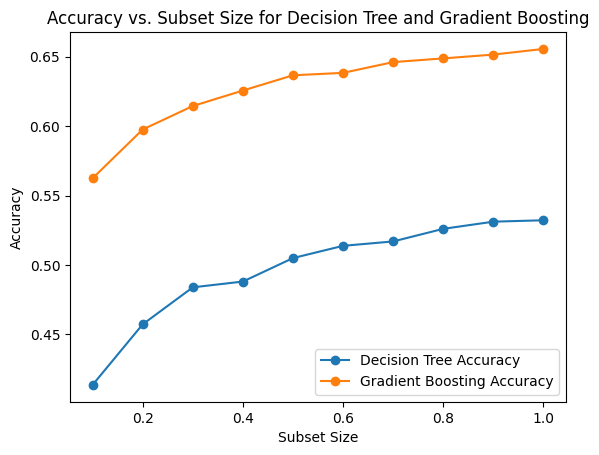

In [41]:
subset_sizes = result_df['Subset Size']
dt_accuracies = result_df['Decision Tree Accuracy']
gb_accuracies = result_df['Gradient Boosting Accuracy']

# Plot Decision Tree accuracy
plt.plot(subset_sizes, dt_accuracies, marker='o', label='Decision Tree Accuracy')

# Plot Gradient Boosting accuracy
plt.plot(subset_sizes, gb_accuracies, marker='o', label='Gradient Boosting Accuracy')

plt.xlabel('Subset Size')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Subset Size for Decision Tree and Gradient Boosting')
plt.legend()

plt.show()

**Answer:**

From this graph we can notice that as our training size increases so does the accuracy. We can also notice that throughout the training Gradient Boosting accuracy is higher. Further, we can see that as we increase the size more and more, the benefit is smaller and smaller, while the accuracy does increse it increases less and less with every incremental increase in the training size. This effect of diminishing returns is much larger with Gradient Boosting - the returns/benefits are very small after a certain (e.g. 3rd or 4th in our case) training size increase.

## 1.4

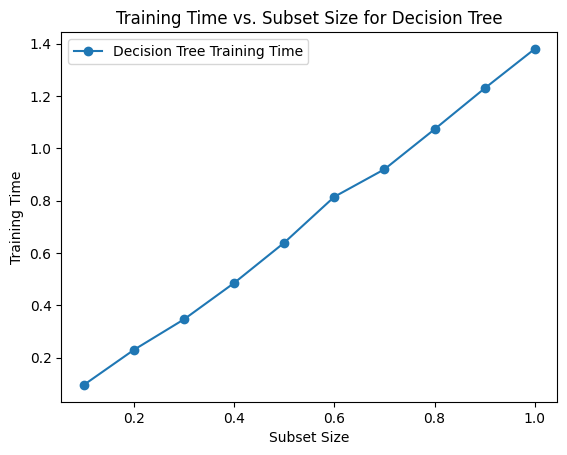

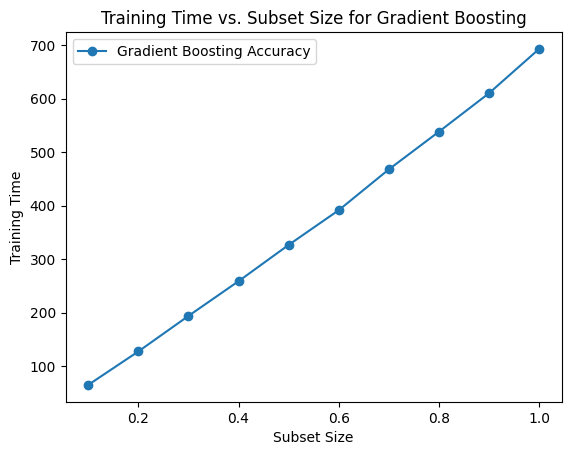

In [42]:
subset_sizes = result_df['Subset Size']
dt_time = result_df['Training Time DT(s)']
gb_time = result_df['Training Time GB(s)']

# Plot Decision Tree training time
plt.plot(subset_sizes, dt_time, marker='o', label='Decision Tree Training Time')
plt.xlabel('Subset Size')
plt.ylabel('Training Time')
plt.title('Training Time vs. Subset Size for Decision Tree')
plt.legend()

plt.show()


# Plot Gradient Boosting accuracy
plt.plot(subset_sizes, gb_time, marker='o', label='Gradient Boosting Accuracy')

plt.xlabel('Subset Size')
plt.ylabel('Training Time')
plt.title('Training Time vs. Subset Size for Gradient Boosting')
plt.legend()

plt.show()

**Answer:**

Just like with accuracy we can see that increasing the training size increases the training time for both modles. This is to be expected as there will be more data for model to train on. Further for both algorithms we can notice that this time increase is almost linear with each subset increase. However, the time that Gradient Boosting algorithm takes for any training is much larget that that of Decision tree; for Decision Tree algorithm the maximal training time is around 1.38s while for the Gradient Boosing the minimal traning time is around 64.94 seconds and maximal at 693.09 seconds which makes it much much slower than Decision Trees algorithm.

## 1.5

In [43]:
result_df

,Subset Size,Decision Tree Accuracy,Gradient Boosting Accuracy,Training Time DT(s),Training Time GB(s)
0,0.1,0.413500,0.562417,0.095421,64.935028
1,0.2,0.457167,0.597583,0.229568,127.451412
2,0.3,0.483833,0.614500,0.346208,193.855375
3,0.4,0.488000,0.625667,0.485116,258.803024
4,0.5,0.504917,0.636667,0.639140,326.655362
5,0.6,0.513750,0.638417,0.814642,391.553760
6,0.7,0.516917,0.646167,0.919731,467.842729
7,0.8,0.526000,0.648833,1.072674,538.336715
8,0.9,0.531167,0.651583,1.229102,610.249179
9,1.0,0.532167,0.655667,1.379899,693.092181


**Answer:**
From this analysis, as previously mentioned, we can notice that increasing the training subset size increases both the acuraccy and training time for both algorithms. Futher, we can notice that at some point increasing the training subset size might not be worth the training time increase since the accuracy starts increasing by very little, especially for the gradient boosting algorithm. However, since our accuracy is quite low to being with, it might be worth the extra time. Further, we noticed that with Gradient Boosting algorithm accuracy is significantly higher thoughout the training but this difference gets smaller as the training subset size increases. When using the full training set we can notice that the accuracy of Gradient Boosting is only about 0.123 higer than Decision Tree algorithm compared to when using only 10% of the dataset when the difference was 0.149. However, we might want to consider if that amount of more precision is worth the training time of Gradient Boosting as it takes much longer, for example to train on the entire set it takes about 693 seconds compared to 1.37 seconds it takes with Decision Trees. I would say that in our case if we have the resurces, the extra time to train Gradient Boosing model might be worth it as it leads to over 12 percentage points higher accuracy.